In [1]:
import pandas as pd
# import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns
import time
import os

#clustering library
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn import metrics

from sklearn.cluster import KMeans

from matplotlib import style
style.use('seaborn-darkgrid')


%matplotlib inline

# read data

In [2]:
model_data = pd.read_csv(
    '_Data/model data/model_data_TimeZoneCorrected_08192021.csv')  #.sample(2000, random_state=0)

## define variables for model
trip_variables = [
    'tripDistance_miles', 'tripDuration', 'route_directness_trace',
    'average_trip_speed_mph', 'high_trip_count_day', 'weekend_trip',
    'StartTime_AMPeak', 'StartTime_Day', 'StartTime_PMPeak', 'StartTime_Night',
    'PRCP', 'TAVG'
]

landuse_variables = [
    'MEAN_CBD_start',
    'MEAN_URBAN_start',
    'MEAN_SU_start',
    'MEAN_RURAL_start',
    'MEAN_POP_D_start',
    'MEAN_EMP_D_start',
    'MEAN_PAKING_start',
    'intersection_density_start',
    'enthropy_start',
    'MEAN_CBD_end',
    'MEAN_URBAN_end',
    'MEAN_SU_end',
    'MEAN_RURAL_end',
    'MEAN_POP_D_end',
    'MEAN_EMP_D_end',
    'MEAN_PAKING_end',
    'intersection_density_end',
    'enthropy_end',
]

flag_variables = [
    'PARK_start', 'VANDERBILT_start', 'NISSAN_start', 'PARK_end',
    'VANDERBILT_end', 'NISSAN_end'
]

remaining_var = [
    'trip_id', 'GRID_ID_start', 'GRID_ID_end', 'tripDistance',
    'euclidean_distance', 'StartTime_decimal', 'trip_start_hour_no', 'DATE_str'
]

variable_forPCA = trip_variables + landuse_variables

### rename variables

rename_variables = {
    'tripDistance_miles': 'Route distance (miles)',
    'tripDuration': 'Trip duration (minutes)',
    'route_directness_trace': 'Route directness ratio',
    'average_trip_speed_mph': 'Average trip speed (mph)',
    'high_trip_count_day': 'Trips on special event',
    'weekend_trip': 'Weekend trips',
    'StartTime_AMPeak': 'Trip during 7 am and 10 am',
    'StartTime_Day': 'Trip during 10 am and 4 pm',
    'StartTime_PMPeak': 'Trip during 4 pm and 8 pm',
    'StartTime_Night': 'Trip during 8 pm and 7 am',
    'PRCP': 'Average daily precipitation',
    'TAVG': 'Average daily temperature',
    'MEAN_CBD_start': 'Proportion of CBD land use at origin',
    'MEAN_URBAN_start': 'Proportion of urban land use at origin',
    'MEAN_SU_start': 'Proportion of sub-urban land use at origin',
    'MEAN_RURAL_start': 'Proportion of rural land use at origin',
    'MEAN_POP_D_start': 'Average population density at origin',
    'MEAN_EMP_D_start': 'Average employment density at origin',
    'MEAN_PAKING_start': 'Average parking density at origin',
    'intersection_density_start':
    'Intersection density (per sq. miles) at origin',
    'enthropy_start': 'Entropy at origin',
    'MEAN_CBD_end': 'Proportion of CBD land use at destination',
    'MEAN_URBAN_end': 'Proportion of urban land use at destination',
    'MEAN_SU_end': 'Proportion of sub-urban land use at destination',
    'MEAN_RURAL_end': 'Proportion of rural land use at destination',
    'MEAN_POP_D_end': 'Average population density at destination',
    'MEAN_EMP_D_end': 'Average employment density at destination',
    'MEAN_PAKING_end': 'Average parking density at destination',
    'intersection_density_end':
    'Intersection density (per sq. miles) at destination',
    'enthropy_end': 'Entropy at destination'
}



# PCA 

## Variation explained plot

array([0.26589835, 0.42549859, 0.5108584 , 0.58884802, 0.66425847,
       0.71834801, 0.7654558 , 0.80742787, 0.84393007, 0.87801181,
       0.90353471])

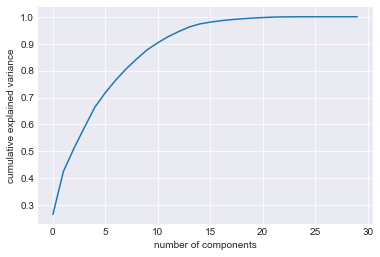

In [3]:
cluster_data = model_data[variable_forPCA]

scaler = MinMaxScaler()
PCA_data_scaled_graph = scaler.fit_transform(cluster_data)           #PCA_data for all data. nonPCA_data for selected data

# Make an instance of the Model
pca = PCA().fit(PCA_data_scaled_graph)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# plt.savefig('results/pca_variance_graph.png', dpi=900)

np.cumsum(pca.explained_variance_ratio_)[:11]

## PCA decomposition

In [5]:
variable_forPCA.append('trip_id')
cluster_data_df = model_data[variable_forPCA]



#StandardScaler to transform data
PCA_data_scaled = MinMaxScaler().fit_transform(cluster_data)

pca_m =PCA(n_components=11)
# create a PCA modified dataset
pca_dataset = pca_m.fit(PCA_data_scaled).transform(PCA_data_scaled)

### PCA loading

Explanation of PCA loadings: http://strata.uga.edu/8370/lecturenotes/principalComponents.html

In [6]:
pca_loadings = round(
    pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_),
                 index=cluster_data.columns).iloc[:, :11], 2).rename(
                     columns={
                         0: 'PC1',
                         1: 'PC2',
                         2: 'PC3',
                         3: 'PC4',
                         4: 'PC5',
                         5: 'PC6',
                         6: 'PC7',
                         7: 'PC8',
                         8: 'PC9',
                         9: 'PC10',
                         10: 'PC11'
                     }, index=rename_variables)

# pca_loadings.to_excel('../1_Data/Model results/pca_loadings.xlsx')
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Route distance (miles),0.00,-0.00,-0.00,0.01,0.00,-0.01,0.01,0.02,0.02,0.01,-0.00
Trip duration (minutes),-0.00,-0.00,-0.01,0.01,0.00,-0.01,-0.00,0.02,0.03,0.00,-0.00
Route directness ratio,-0.00,0.02,0.03,-0.03,-0.01,0.06,0.04,-0.18,-0.22,-0.04,-0.00
Average trip speed (mph),0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00
Trips on special event,0.00,0.01,-0.04,0.09,0.09,0.02,0.31,0.03,0.01,0.00,-0.00
Weekend trips,-0.00,0.14,-0.19,0.27,0.22,0.04,-0.10,-0.02,-0.03,0.02,0.00
Trip during 7 am and 10 am,0.00,0.02,0.05,-0.05,0.02,0.02,0.00,-0.02,-0.03,0.24,0.00
Trip during 10 am and 4 pm,-0.00,-0.47,-0.15,0.05,-0.03,-0.00,-0.01,0.00,-0.01,-0.06,-0.00
Trip during 4 pm and 8 pm,0.00,0.37,-0.20,-0.08,-0.12,-0.01,0.02,0.01,0.01,-0.08,-0.00
Trip during 8 pm and 7 am,0.00,0.08,0.30,0.08,0.13,-0.01,-0.02,0.01,0.02,-0.10,-0.00


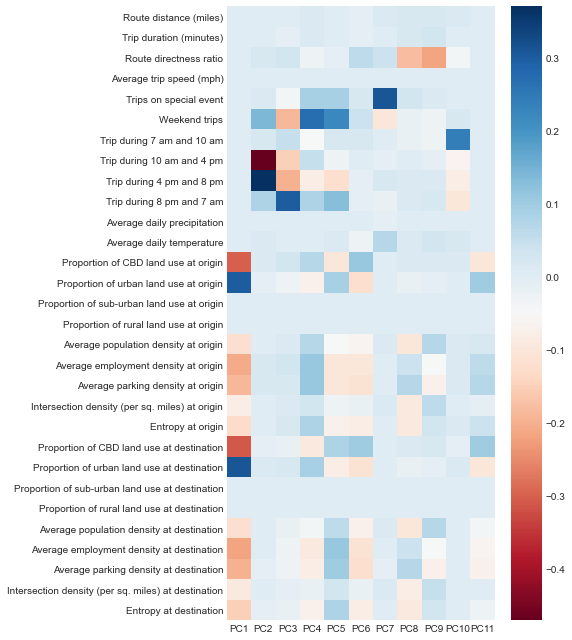

In [8]:
style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(8, 9))
p = sns.heatmap(pca_loadings,cmap='RdBu', ax=ax)  #RdBu

plt.tight_layout()
plt.savefig('results/PCA_loadings_TimeZoneCorrected.png', dpi=300)

### Save PCA for model

In [9]:
# store it in a new data frame
pca_dataset = pd.DataFrame(
    data=pca_dataset,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11',])

pca_dataset['trip_id']=model_data['trip_id']
pca_dataset.to_csv('_Data/model data/model_data_pca_TimeZoneCorrected_08192021.csv')

pca_dataset

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,trip_id
0,-0.278910,0.201416,0.579503,0.361390,-0.789892,0.264812,0.002563,0.297086,-0.074968,1.117087,0.546096,9
1,0.584845,0.117394,0.314076,-0.464054,0.141488,0.121896,-0.058889,0.195478,0.457586,1.058427,0.315773,10
2,0.002948,0.196297,0.543176,0.386317,-0.732730,-0.225322,-0.028304,0.463978,-0.001866,1.182686,-0.013028,11
3,-0.880039,0.134243,0.321000,-0.495607,0.194789,-0.282383,-0.029564,-0.015468,0.144842,1.034785,-0.226734,12
4,0.002690,0.196265,0.543085,0.385788,-0.732716,-0.224497,-0.029139,0.460651,-0.005577,1.180706,-0.013012,13
...,...,...,...,...,...,...,...,...,...,...,...,...
1050492,-0.901911,0.700380,-0.233530,-0.509441,-0.185855,-0.555516,-0.011494,0.346991,0.200329,-0.043471,-0.062307,1547656
1050493,-0.090488,0.687637,-0.194270,-0.508306,-0.285648,0.189857,0.003108,0.029504,0.463463,-0.085111,0.234048,1547657
1050494,-0.533594,0.687995,-0.225060,-0.667994,-0.117926,0.082208,0.017393,0.122690,0.200392,-0.115874,-0.286455,1547658
1050495,-0.370324,0.691993,-0.224565,-0.746544,-0.045730,-0.053264,0.070266,-0.177257,-0.127854,-0.185958,-0.041850,1547659


# K means

Note: the Silhoutte score of models were calculated in more powerful work station. Please refer 3_1_clustering_codes_final.py file for code.

# read model results

In [2]:
model_results_df = pd.read_csv(
    'results/kmeans_results_all_TimeZoneCorrected_08202021.csv'
)
model_results_df.head()

,Unnamed: 0,Cluster_type,Cluster_no,Silhouette_score,DB_score,Kmeans_label_list
0,0,Kmeans,2,0.620508,0.509478,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,Kmeans,3,0.586466,0.504083,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
2,2,Kmeans,4,0.575169,0.494641,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,3,Kmeans,5,0.561704,0.500868,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
4,4,Kmeans,6,0.554969,0.505429,"[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."


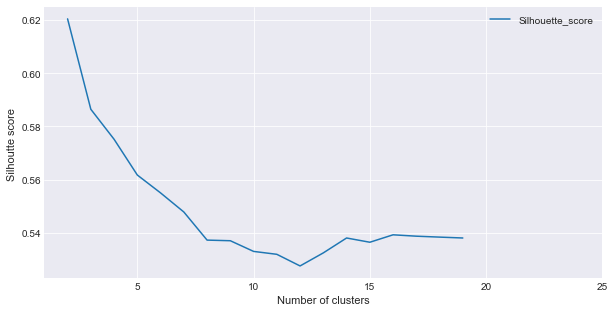

In [6]:
style.use('seaborn-darkgrid')

# fig, ax = plt.subplots(figsize=(10, 5))

model_results_df.plot.line(y='Silhouette_score', x='Cluster_no',figsize=(10, 5))

#axis label
# _ = plt.title('Cluste', fontsize=13)
plt.xlabel('Number of clusters', fontsize=11)
plt.ylabel('Silhoutte score ', fontsize=11)
# ax.tick_params(axis='both', which='major', labelsize=9)
# ax.tick_params(axis='both', which='minor', labelsize=9)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(1,25)
plt.legend()
plt.savefig('results/Silhoutte_Score_TimeZoneCorrected.png', dpi=900)

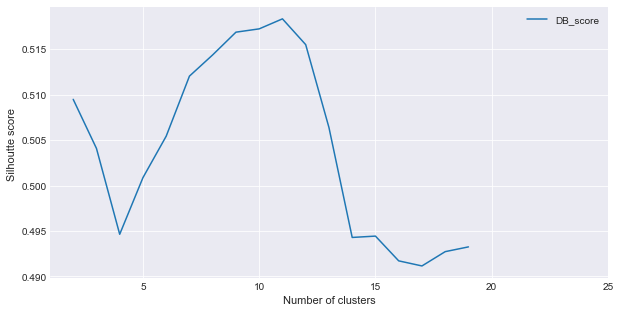

In [9]:
model_results_df.plot.line(y='DB_score', x='Cluster_no',figsize=(10, 5))
#axis label
# _ = plt.title('Cluste', fontsize=13)
plt.xlabel('Number of clusters', fontsize=11)
plt.ylabel('Silhoutte score ', fontsize=11)
# ax.tick_params(axis='both', which='major', labelsize=9)
# ax.tick_params(axis='both', which='minor', labelsize=9)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim(1,25)
plt.legend()

## 6 PCs

In [17]:
model_results_6PC_df = pd.read_csv(
    'results/kmeans_results_all_TimeZoneCorrected_08202021_only10PCs.csv'
)
model_results_6PC_df.head()

,Unnamed: 0,Cluster_type,Cluster_no,Silhouette_score,DB_score,Elbow,Kmeans_label_list
0,0,Kmeans,2,0.222482,1.756106,1.702313e+06,"[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,Kmeans,3,0.206382,1.721038,1.451997e+06,"[0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,Kmeans,4,0.245122,1.635725,1.291006e+06,"[3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
3,3,Kmeans,5,0.208143,1.684889,1.193487e+06,"[3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
4,4,Kmeans,6,0.232147,1.517426,1.106460e+06,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."


<AxesSubplot:xlabel='Cluster_no'>

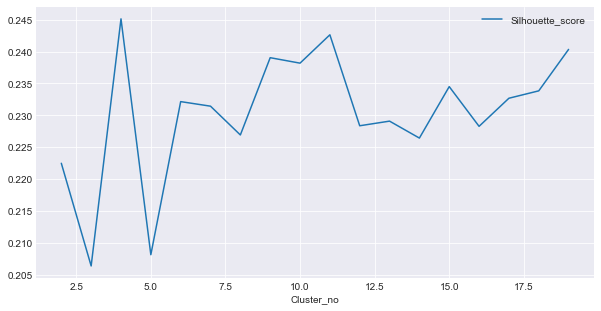

In [18]:
model_results_6PC_df.plot.line(y='Silhouette_score', x='Cluster_no',figsize=(10, 5))

<AxesSubplot:xlabel='Cluster_no'>

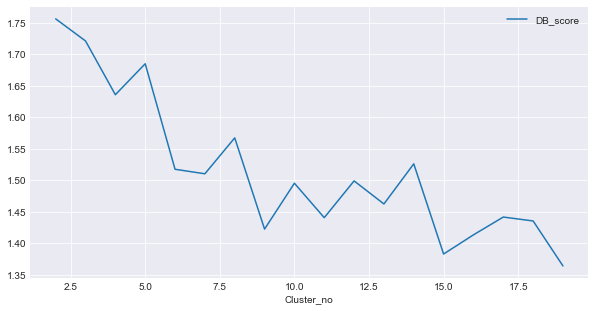

In [19]:
model_results_6PC_df.plot.line(y='DB_score', x='Cluster_no',figsize=(10, 5))

<AxesSubplot:xlabel='Cluster_no'>

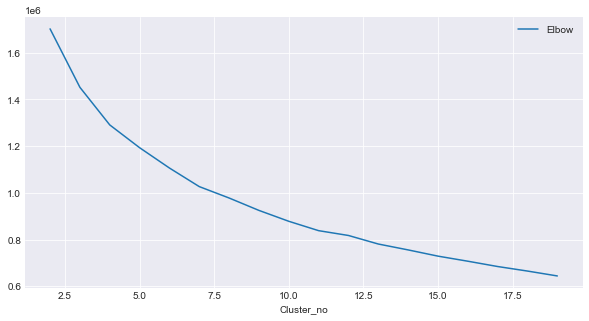

In [20]:
model_results_6PC_df.plot.line(y='Elbow', x='Cluster_no',figsize=(10, 5))